In [2]:
import cv2
import albumentations as A
import numpy as np
from utils import plot_examples
import os

In [3]:
#upgrading albumentations
! pip install --upgrade albumentations

Requirement already up-to-date: albumentations in /usr/local/lib/python3.7/dist-packages (0.5.2)


In [4]:
#defining transform pipeline

transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5),
        ], p=1.0),
    ], bbox_params=A.BboxParams(format='yolo')
)

In [5]:
image = cv2.imread("/content/images/000001_JPG.rf.ccfdd243a78a6cfa119be0349d18c0ed.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
bboxes = [
    [0.436070, 0.141850, 0.211193, 0.0778190, 0],
    [0.519404, 0.774969, 0.091912, 0.133885, 0],
]

/content/AugmentedImages
[(0.209375, 0.6666666666666666, 0.1702217690657133, 0.280139306168626, 0)]
[(0.30859375, 0.001388888888888889, 0.312624916712702, 0.005879275365938463, 0), (0.34375, 0.8638888888888889, 0.15277294959692383, 0.2235422977117717, 0)]


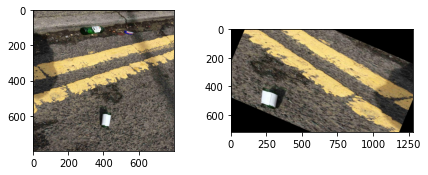

In [11]:
images_list = [image]
bboxes_list = [bboxes]
count = 1
aug_img = 'augmented'
path = '/content/AugmentedImages/'
%cd /content/AugmentedImages/
for i in range(2):
    augmentations = transform(image=image, bboxes=bboxes)
    augmented_img = augmentations["image"]
    transformed_bboxes = augmentations['bboxes']


    aug_img_name = aug_img + str(count)
    cv2.imwrite(os.path.join(path , aug_img_name+'.jpg'), augmented_img)
    #cv2.waitKey(0)
    images_list.append(augmented_img)
    bboxes_list.append(transformed_bboxes)
    count = count + 1
plot_examples(images_list)

In [14]:
image = cv2.imread("/content/images/000001_JPG.rf.ccfdd243a78a6cfa119be0349d18c0ed.jpg")
filename = 'anything.jpg'
cv2.imwrite(filename, image)

True

In [8]:
bboxes_list

[[[0.43607, 0.14185, 0.211193, 0.077819, 0],
  [0.519404, 0.774969, 0.091912, 0.133885, 0]],
 [(0.31328125,
   0.5888888888888889,
   0.1757913168112189,
   0.29871213907482114,
   0)],
 [(0.5390625, 0.8694444444444445, 0.1660534827517605, 0.2568062290374354, 0)]]

In [37]:
test_list = []

count = 1
for box in bboxes_list:
  final_list = []
  #bx = np.array(box)
  print('Inside image: ' + str(count))

  for b in box:
    bx = []
    bx.append(int(b[4]))
    bx.append(b[1])
    bx.append(b[2])
    bx.append(b[3])
    bx.append(b[0])
    print(bx)
    final_list.append(bx)
  
  with open('augmented'+str(count)+".txt", 'a') as f:

    for lst in final_list:
      var = lst[0]
      lst.pop(0)
      f.write(str(var)+' ')

      var = lst[0]
      lst.pop(0)
      f.write(str(var)+' ')

      var = lst[0]
      lst.pop(0)
      f.write(str(var)+' ')

      var = lst[0]
      lst.pop(0)
      f.write(str(var)+' ')

      var = lst[0]
      lst.pop(0)
      f.write(str(var)+ '\n')

      #f.write(str([("%.6f" % a)for a in lst]) + '\n')

  count = count + 1

Inside image: 1
[0, 0.14185, 0.211193, 0.077819, 0.43607]
[0, 0.774969, 0.091912, 0.133885, 0.519404]
Inside image: 2
[0, 0.6666666666666666, 0.1702217690657133, 0.280139306168626, 0.209375]
Inside image: 3
[0, 0.001388888888888889, 0.312624916712702, 0.005879275365938463, 0.30859375]
[0, 0.8638888888888889, 0.15277294959692383, 0.2235422977117717, 0.34375]


True